In [3]:
# !pip install -qU langchain tiktoken matplotlib seaborn tqdm colab-env

In [2]:
from langchain.document_loaders.recursive_url_loader import RecursiveUrlLoader
url = "https://python.langchain.com/docs/modules/"
print(url)
loader = RecursiveUrlLoader(url=url)
modules = loader.load()

https://python.langchain.com/docs/modules/


In [4]:
url = "https://python.langchain.com/docs/guides/"
print(url)
loader = RecursiveUrlLoader(url=url)
guides = loader.load()


https://python.langchain.com/docs/guides/


In [5]:
url = "https://python.langchain.com/docs/ecosystem/"
print(url)
loader = RecursiveUrlLoader(url=url)
ecosystem = loader.load()


https://python.langchain.com/docs/ecosystem/


In [6]:
url = "https://python.langchain.com/docs/additional_resources/"
print(url)
loader = RecursiveUrlLoader(url=url)
additional_resources = loader.load()
len(additional_resources)

https://python.langchain.com/docs/additional_resources/


2

In [7]:
url = "https://python.langchain.com/docs/use_cases/"
print(url)
loader = RecursiveUrlLoader(url=url)
use_cases = loader.load()
len(use_cases)

https://python.langchain.com/docs/use_cases/


97

In [8]:
url = "https://python.langchain.com/docs/integrations/"
print(url)
loader = RecursiveUrlLoader(url=url)
integrations = loader.load()
len(integrations)

https://python.langchain.com/docs/integrations/


501

In [9]:
print("Modules :: ", len(modules))
print("Guides :: ", len(guides))
print("Ecosystem :: ", len(ecosystem))
print("Additional Resources :: ", len(additional_resources))
print("Use Cases :: ", len(use_cases))
print("Integrations :: ", len(integrations))



Modules ::  146
Guides ::  24
Ecosystem ::  1
Additional Resources ::  2
Use Cases ::  97
Integrations ::  501


In [10]:
integrations[5].metadata

{'source': 'https://python.langchain.com/docs/integrations/toolkits/spark_sql',
 'title': 'Spark SQL Agent | \uf8ffü¶úÔ∏è\uf8ffüîó Langchain',
 'description': 'This notebook shows how to use agents to interact with a Spark SQL. Similar to SQL Database Agent, it is designed to address general inquiries about Spark SQL and facilitate error recovery.',
 'language': 'en'}

In [11]:
import tiktoken

tokenizer = tiktoken.get_encoding('cl100k_base')

# create the length function
def tiktoken_len(text):
    tokens = tokenizer.encode(
        text,
        disallowed_special=()
    )
    return len(tokens)

In [12]:
tiktoken.encoding_for_model('gpt-3.5-turbo')

<Encoding 'cl100k_base'>

In [13]:
token_counts = [tiktoken_len(doc.page_content) for doc in integrations]

In [14]:
print(f"""Min: {min(token_counts)}
Avg: {int(sum(token_counts) / len(token_counts))}
Max: {max(token_counts)}""")

Min: 115
Avg: 1320
Max: 13610


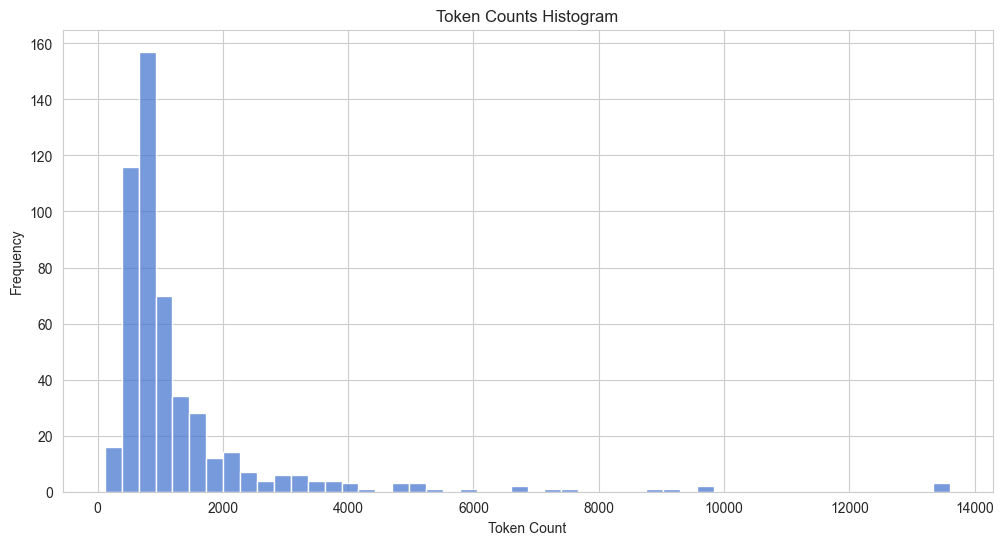

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# set style and color palette for the plot
sns.set_style("whitegrid")
sns.set_palette("muted")

# create histogram
plt.figure(figsize=(12, 6))
sns.histplot(token_counts, kde=False, bins=50)

# customize the plot info
plt.title("Token Counts Histogram")
plt.xlabel("Token Count")
plt.ylabel("Frequency")

plt.show()

In [16]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=400,
    chunk_overlap=20,  # number of tokens overlap between chunks
    length_function=tiktoken_len,
    separators=['\n\n', '\n', ' ', '']
)

In [17]:
# chunks = text_splitter.split_text(integrations[5].page_content)
# len(chunks)

In [18]:
# tiktoken_len(chunks[0]), tiktoken_len(chunks[1])

In [19]:
# import hashlib
# url = integrations[5].metadata['source']
# print(url)
# m = hashlib.md5()  # this will convert URL into unique ID
# # convert URL to unique ID
# m.update(url.encode('utf-8'))
# uid = m.hexdigest()[:12]
# print(uid)

# data = [
#     {
#         'id': f'{uid}-{i}',
#         'text': chunk,
#         'source': url
#     } for i, chunk in enumerate(chunks)
# ]
# data

In [21]:
! pip install ipywidgets


  Obtaining dependency information for ipywidgets from https://files.pythonhosted.org/packages/a3/af/9d5f256025100b578b11d7280e76fda349255666f752b618a613785cb58d/ipywidgets-8.0.7-py3-none-any.whl.metadata
  Obtaining dependency information for widgetsnbextension~=4.0.7 from https://files.pythonhosted.org/packages/8e/d4/d31b12ac0b87e8cc9fdb6ea1eb6596de405eaaa2f25606aaa755d0eebbc0/widgetsnbextension-4.0.8-py3-none-any.whl.metadata
  Obtaining dependency information for jupyterlab-widgets~=3.0.7 from https://files.pythonhosted.org/packages/74/5e/2475ac62faf2e342b2bf20b8d8e375f49400ecb38f52e4e0a7557eb1cedb/jupyterlab_widgets-3.0.8-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.3/138.3 kB 3.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.0/215.0 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 12.9 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run

In [35]:
from tqdm.auto import tqdm
import hashlib
m = hashlib.md5()  # this will convert URL into unique ID

In [36]:


documents = []

# iterate over each document in integrations
for doc in tqdm(integrations):
    url = doc.metadata['source']
    m.update(url.encode('utf-8'))
    uid = m.hexdigest()[:12]

    # split the document into chunks
    chunks = text_splitter.split_text(doc.page_content)

    # iterate over each chunk and create a dictionary with id, text and source
    for i, chunk in enumerate(chunks):
        documents.append({
            'id': f'{uid}-{i}',
            'text': chunk,
            'source': url
        })

# print the number of documents
len(documents)

import json

# write the documents to a jsonl file
with open('train.jsonl', 'w') as f:
    for doc in documents:
        f.write(json.dumps(doc) + '\n')

100%|██████████| 501/501 [00:05<00:00, 87.65it/s] 


In [37]:
from tqdm.auto import tqdm

documents = []

for doc in tqdm(use_cases):
    url = doc.metadata['source']
    m.update(url.encode('utf-8'))
    uid = m.hexdigest()[:12]
    chunks = text_splitter.split_text(doc.page_content)
    for i, chunk in enumerate(chunks):
        documents.append({
            'id': f'{uid}-{i}',
            'text': chunk,
            'source': url
        })

len(documents)
import json

with open('use-cases_train.jsonl', 'w') as f:
    for doc in documents:
        f.write(json.dumps(doc) + '\n')

100%|██████████| 97/97 [00:02<00:00, 42.76it/s]


In [38]:
from tqdm.auto import tqdm

documents = []

for doc in tqdm(modules):
    url = doc.metadata['source']
    m.update(url.encode('utf-8'))
    uid = m.hexdigest()[:12]
    chunks = text_splitter.split_text(doc.page_content)
    for i, chunk in enumerate(chunks):
        documents.append({
            'id': f'{uid}-{i}',
            'text': chunk,
            'source': url
        })

len(documents)
import json

with open('modules_train.jsonl', 'w') as f:
    for doc in documents:
        f.write(json.dumps(doc) + '\n')

100%|██████████| 146/146 [00:01<00:00, 75.50it/s] 


In [39]:
from tqdm.auto import tqdm

documents = []

for doc in tqdm(guides):
    url = doc.metadata['source']
    m.update(url.encode('utf-8'))
    uid = m.hexdigest()[:12]
    chunks = text_splitter.split_text(doc.page_content)
    for i, chunk in enumerate(chunks):
        documents.append({
            'id': f'{uid}-{i}',
            'text': chunk,
            'source': url
        })

len(documents)
import json

with open('guides_train.jsonl', 'w') as f:
    for doc in documents:
        f.write(json.dumps(doc) + '\n')

100%|██████████| 24/24 [00:00<00:00, 45.13it/s]


In [40]:
from tqdm.auto import tqdm

documents = []

for doc in tqdm(ecosystem):
    url = doc.metadata['source']
    m.update(url.encode('utf-8'))
    uid = m.hexdigest()[:12]
    chunks = text_splitter.split_text(doc.page_content)
    for i, chunk in enumerate(chunks):
        documents.append({
            'id': f'{uid}-{i}',
            'text': chunk,
            'source': url
        })

len(documents)
import json

with open('ecosystem_train.jsonl', 'w') as f:
    for doc in documents:
        f.write(json.dumps(doc) + '\n')

100%|██████████| 1/1 [00:00<00:00, 14.34it/s]


In [41]:
from tqdm.auto import tqdm

documents = []

for doc in tqdm(additional_resources):
    url = doc.metadata['source']
    m.update(url.encode('utf-8'))
    uid = m.hexdigest()[:12]
    chunks = text_splitter.split_text(doc.page_content)
    for i, chunk in enumerate(chunks):
        documents.append({
            'id': f'{uid}-{i}',
            'text': chunk,
            'source': url
        })

len(documents)
import json

with open('additional_resources_train.jsonl', 'w') as f:
    for doc in documents:
        f.write(json.dumps(doc) + '\n')

100%|██████████| 2/2 [00:00<00:00, 51.03it/s]


In [42]:
# #test by loading the file
# documents = []

# with open('train.jsonl', 'r') as f:
#     for line in f:
#         documents.append(json.loads(line))

# len(documents)

In [43]:
documents[0]

{'id': '774beb3580a4-0',
 'text': 'Tutorials | \uf8ffü¶úÔ∏è\uf8ffüîó Langchain',
 'source': 'https://python.langchain.com/docs/additional_resources/tutorials'}